## Imports

In [58]:
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

## Prepare Data

### Load Data

In [4]:
# Dummy excel
gsheet = "https://docs.google.com/spreadsheets/d/1S6_jPmeOA-SL6jDyX53FsQ3NPyWfZD8gfQ8CnBs7lqM/export?format=xlsx"

df = pd.read_excel(gsheet, engine="openpyxl", sheet_name="Analysis")
df.head()

,Date,Expense,Purpose,Category
0,2024-09-01,1194,Curtains,Flat
1,2024-09-01,112,Auto,Transport
2,2024-09-01,206,Mc Donalds,Food
3,2024-09-01,118,Auto,Transport
4,2024-09-01,140,Swiggy,Food


In [5]:
df.info()
print("\n========================================================\n")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      87 non-null     datetime64[ns]
 1   Expense   87 non-null     int64         
 2   Purpose   87 non-null     object        
 3   Category  87 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.8+ KB




,Date,Expense
count,87,87.000000
mean,2024-09-20 03:35:10.344827648,712.908046
min,2024-09-01 00:00:00,10.000000
25%,2024-09-06 00:00:00,75.500000
50%,2024-09-20 00:00:00,160.000000
75%,2024-09-29 00:00:00,344.500000
max,2024-10-18 00:00:00,17103.000000
std,NaN,2468.418944


#### Calendar Data

In [ ]:
# Get the current year
current_year = datetime.now().year - 1 # Taken previous year for testing seeing the data

# Generate a date range for the entire year
start_date = datetime(current_year, 1, 1)
end_date = datetime(current_year, 12, 31)

# Create a date range for all dates in the year
all_dates = pd.date_range(start=start_date, end=end_date, freq="D")

# Create a DataFrame with dates and day names
df_dt = pd.DataFrame(
    {
        "Date": all_dates,
        "M": list(map(int, list(all_dates.strftime("%m")))), # Month number
        "W": list(map(int, list(all_dates.strftime("%U")))), # Week number
        "D": list(map(int, list(all_dates.strftime("%d")))), # Day number
        "Month": all_dates.strftime("%B"), # Month name
        "Day": all_dates.strftime("%A"), # Day name
    }
)

# Set filter for purpose and category
purpose = set(df_dt_with_exp['Purpose'])
category = set(df_dt_with_exp['Category']) - {'Flat'}

# Merge datetime data and the expense data
df_dt_with_exp = df_dt.merge(df[(df['Purpose'].isin(purpose)) & (df['Category'].isin(category))], left_on="Date", right_on="Date", how="left")

# Day level expense (filtered) with datetime attributes
df_calendar = df_dt_with_exp.groupby(['Date', 'M', 'W', 'D', 'Month', 'Day']).agg({'Expense': lambda x: x.sum() if not x.isnull().all() else float('nan')}).reset_index()



,Date,M,W,D,Month,Day,Expense
244,2024-09-01,9,35,1,September,Sunday,576.0
245,2024-09-02,9,35,2,September,Monday,70.0
246,2024-09-03,9,35,3,September,Tuesday,343.0
247,2024-09-04,9,35,4,September,Wednesday,540.0
248,2024-09-05,9,35,5,September,Thursday,5419.0
249,2024-09-06,9,35,6,September,Friday,247.0
250,2024-09-07,9,35,7,September,Saturday,NaN
251,2024-09-08,9,36,8,September,Sunday,NaN
252,2024-09-09,9,36,9,September,Monday,NaN
253,2024-09-10,9,36,10,September,Tuesday,NaN


#### Format calendar for a Month

In [259]:

day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

current_month_df = df_calendar[df_calendar['M']==9]
calendar = current_month_df.pivot(columns="Day", index="W", values="D")[day_order]
calendar_exp = current_month_df.pivot(columns="Day", index="W", values="Expense")[day_order]

max_date = df_calendar[df_calendar["Month"] == "September"]['D'].max().item()
calendar_exp

Day,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
W,,,,,,,
35,576.0,70.0,343.0,540.0,5419.0,247.0,NaN
36,NaN,NaN,NaN,449.0,70.0,560.0,110.0
37,172.0,90.0,130.0,602.0,647.0,1378.0,NaN
38,893.0,696.0,498.0,NaN,399.0,107.0,225.0
39,76.0,NaN,NaN,NaN,NaN,NaN,NaN


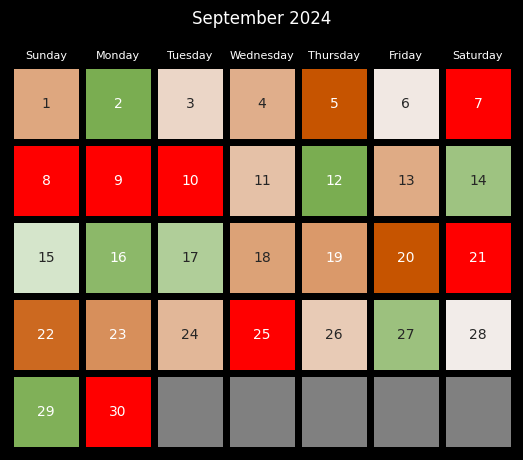

In [391]:
fig, ax = plt.subplots(figsize=(6.5, 5))
highlight = calendar_exp.isna() & ~calendar.isna()
ignore = calendar.isna()

custom_cmap = sns.diverging_palette(120, 25, 100, as_cmap=True)
norm = mcolors.TwoSlopeNorm(vmin=0, vcenter=200, vmax=1000)

custom_cmap_h = sns.color_palette(["red"])
custom_cmap_i = sns.color_palette(["gray"])
# Create a heatmap
sns.heatmap(calendar_exp, annot=calendar, cmap=custom_cmap, norm=norm, linewidths=5, cbar=False, ax=ax)
sns.heatmap(highlight, annot=calendar, mask=highlight == 0, cmap=custom_cmap_h, cbar=False, linewidths=5, ax=ax)
sns.heatmap(ignore, mask=ignore == 0, cmap=custom_cmap_i, cbar=False, linewidths=5, linecolor='black', ax=ax)

ax.set_yticks([])
ax.tick_params(axis='x', which='both', length=0, labelsize=8, labelcolor='white')
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_ticks_position('top')
ax.set_title(f"September {current_year}", pad=30, color='white')
ax.set_facecolor("black")
fig.set_facecolor("black")



In [371]:
current_year

2024